In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBRFClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

from sklearn.preprocessing import LabelEncoder

from imblearn.over_sampling import RandomOverSampler
import warnings
warnings.filterwarnings("ignore")

In [2]:
# !pip install imblearn

In [3]:
data= pd.read_csv('Breast_Cancer.csv')

Explore Data

In [4]:
data.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


In [5]:
data.shape

(4024, 16)

In [6]:
data.isna().sum()

Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status                    0
dtype: int64

In [7]:
for i in data.columns:
    unique_values = np.unique(data[i])
    print(i)
    print(unique_values)


Age
[30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69]
Race
['Black' 'Other' 'White']
Marital Status
['Divorced' 'Married' 'Separated' 'Single ' 'Widowed']
T Stage 
['T1' 'T2' 'T3' 'T4']
N Stage
['N1' 'N2' 'N3']
6th Stage
['IIA' 'IIB' 'IIIA' 'IIIB' 'IIIC']
differentiate
['Moderately differentiated' 'Poorly differentiated' 'Undifferentiated'
 'Well differentiated']
Grade
[' anaplastic; Grade IV' '1' '2' '3']
A Stage
['Distant' 'Regional']
Tumor Size
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  72  73
  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  90  92  94
  95  96  97  98 100 101 103 104 105 107 108 110 115 117 120 123 125 130
 133 140]
Estrogen Status
['Negative'

In [8]:
def tumor_size(tumor_size):
    if tumor_size <= 20:
        return "Small"
    elif 20< tumor_size <= 50:
        return "Medium"
    elif tumor_size > 50: 
        return "Large"
data['Tumor Size Category'] = data['Tumor Size'].apply(tumor_size)

In [9]:
drop_columns = ['Tumor Size']

In [10]:
data.columns

Index(['Age', 'Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status',
       'Tumor Size Category'],
      dtype='object')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

In [12]:
data.duplicated().sum()


1

In [13]:
data.drop_duplicates(inplace = True)


In [14]:
data.duplicated().sum()


0

In [15]:
data.describe()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
count,4023.000000,4023.000000,4023.000000,4023.000000,4023.000000
mean,53.969923,30.477007,14.358439,4.158837,71.301765
std,8.963118,21.121253,8.100241,5.109724,22.923009
min,30.000000,1.000000,1.000000,1.000000,1.000000
25%,47.000000,16.000000,9.000000,1.000000,56.000000
50%,54.000000,25.000000,14.000000,2.000000,73.000000
75%,61.000000,38.000000,19.000000,5.000000,90.000000
max,69.000000,140.000000,61.000000,46.000000,107.000000


Analysis and Inssights

In [16]:
# cat_list=[i for i in data.select_dtypes("object")]
# for i in cat_list:
#     plt.figure(figsize=(10,10)) 
#     sns.countplot(x=i,data=data.loc[:,cat_list])

<AxesSubplot:xlabel='Age', ylabel='Count'>

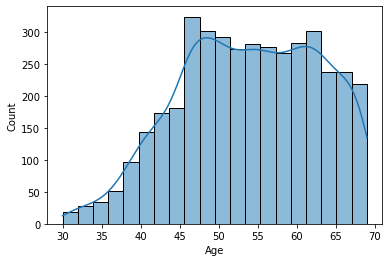

In [17]:
sns.histplot(data['Age'], bins=20, kde=True)


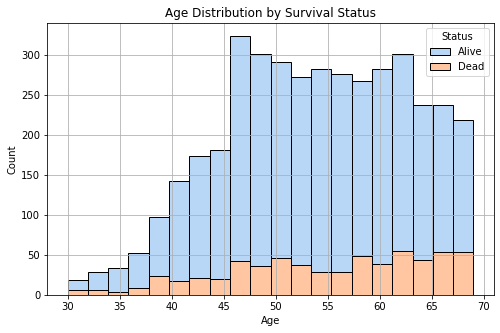

In [18]:
plt.figure(figsize=(8,5))
sns.histplot(data=data, x='Age', hue='Status', multiple='stack', bins=20, palette='pastel')
plt.title('Age Distribution by Survival Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(True)
plt.show()

<AxesSubplot:xlabel='Race', ylabel='count'>

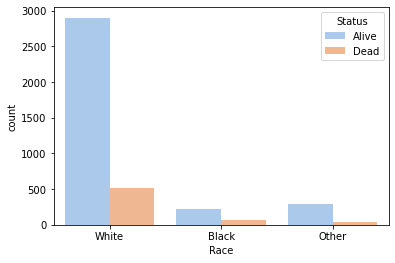

In [19]:
sns.countplot(x='Race', hue='Status', data=data, palette='pastel')


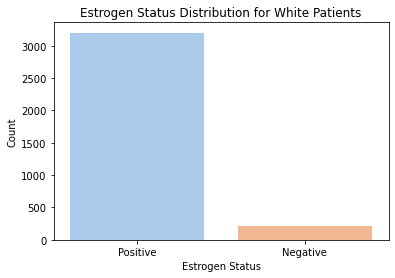

In [20]:
white_df = data[data['Race'] == 'White']
# Plot Estrogen Status distribution for White race
plt.figure(figsize=(6,4))
sns.countplot(data=white_df, x='Estrogen Status', palette='pastel')
plt.title('Estrogen Status Distribution for White Patients')
plt.xlabel('Estrogen Status')
plt.ylabel('Count')
plt.show()

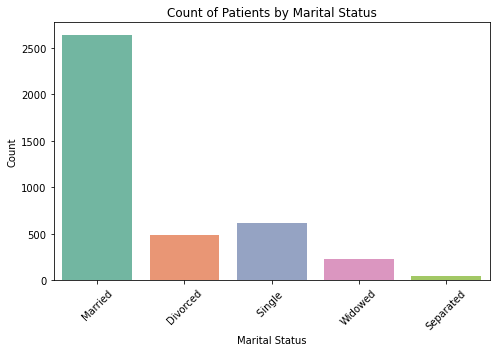

In [22]:
plt.figure(figsize=(7,5))
sns.countplot(data=data, x='Marital Status', palette='Set2')
plt.title('Count of Patients by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

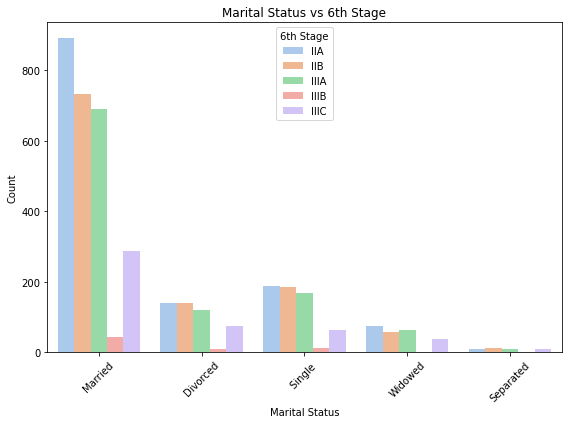

In [48]:
plt.figure(figsize=(8,6))
sns.countplot(
    data=data,
    x='Marital Status',
    hue='6th Stage',
    palette='pastel',
    hue_order=['IIA', 'IIB', 'IIIA', 'IIIB', 'IIIC']  
)
plt.title('Marital Status vs 6th Stage')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.legend(title='6th Stage')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


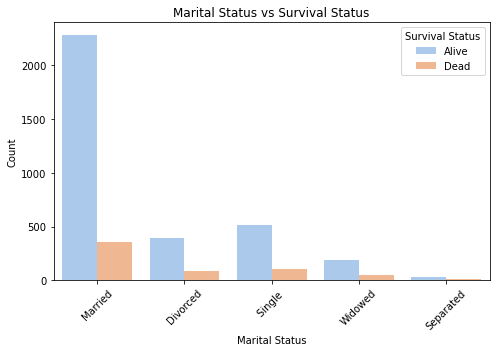

In [49]:
plt.figure(figsize=(7,5))
sns.countplot(data=data, x='Marital Status', hue='Status', palette='pastel')
plt.title('Marital Status vs Survival Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.legend(title='Survival Status')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


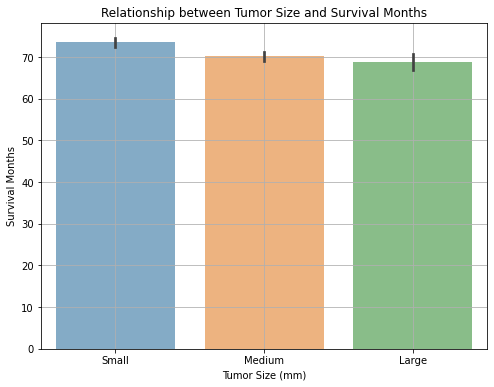

In [50]:
plt.figure(figsize=(8,6))
sns.barplot(data=data, x='Tumor Size Category', y='Survival Months', alpha=0.6)
plt.title('Relationship between Tumor Size and Survival Months')
plt.xlabel('Tumor Size (mm)')
plt.ylabel('Survival Months')
plt.grid(True)
plt.show()

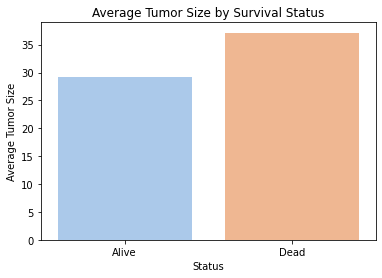

In [51]:
# Calculate average tumor size per status
avg_tumor = data.groupby('Status')['Tumor Size'].mean().reset_index()
sns.barplot(x='Status', y='Tumor Size', data=avg_tumor,palette='pastel')
plt.title('Average Tumor Size by Survival Status')
plt.ylabel('Average Tumor Size')
plt.show()

<AxesSubplot:xlabel='Status', ylabel='count'>

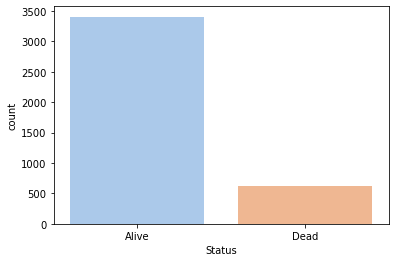

In [52]:
sns.countplot(x="Status", data=data, palette="pastel")
#data not balanced

In [53]:
data.Status.value_counts()

Alive    3407
Dead      616
Name: Status, dtype: int64

Transform Data

In [54]:
la= LabelEncoder()

In [55]:
obj=data.select_dtypes(include=['object']).columns
non_obj=data.select_dtypes(exclude=['object']).columns

In [56]:
for col in obj:
    data[col] = la.fit_transform(data[col].astype(str))

In [57]:
data

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status,Tumor Size Category
0,68,2,1,0,0,0,1,3,1,4,1,1,24,1,60,0,2
1,50,2,1,1,1,2,0,2,1,35,1,1,14,5,62,0,1
2,58,2,0,2,2,4,0,2,1,63,1,1,14,7,75,0,0
3,58,2,1,0,0,0,1,3,1,18,1,1,2,1,84,0,2
4,47,2,1,1,0,1,1,3,1,41,1,1,3,1,50,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,62,1,1,0,0,0,0,2,1,9,1,1,1,1,49,0,2
4020,56,2,0,1,1,2,0,2,1,46,1,1,14,8,69,0,1
4021,68,2,1,1,0,1,0,2,1,22,1,0,11,3,69,0,1
4022,58,0,0,1,0,1,0,2,1,44,1,1,11,1,72,0,1


In [58]:
print(data.dtypes)


Age                       int64
Race                      int32
Marital Status            int32
T Stage                   int32
N Stage                   int32
6th Stage                 int32
differentiate             int32
Grade                     int32
A Stage                   int32
Tumor Size                int64
Estrogen Status           int32
Progesterone Status       int32
Regional Node Examined    int64
Reginol Node Positive     int64
Survival Months           int64
Status                    int32
Tumor Size Category       int32
dtype: object


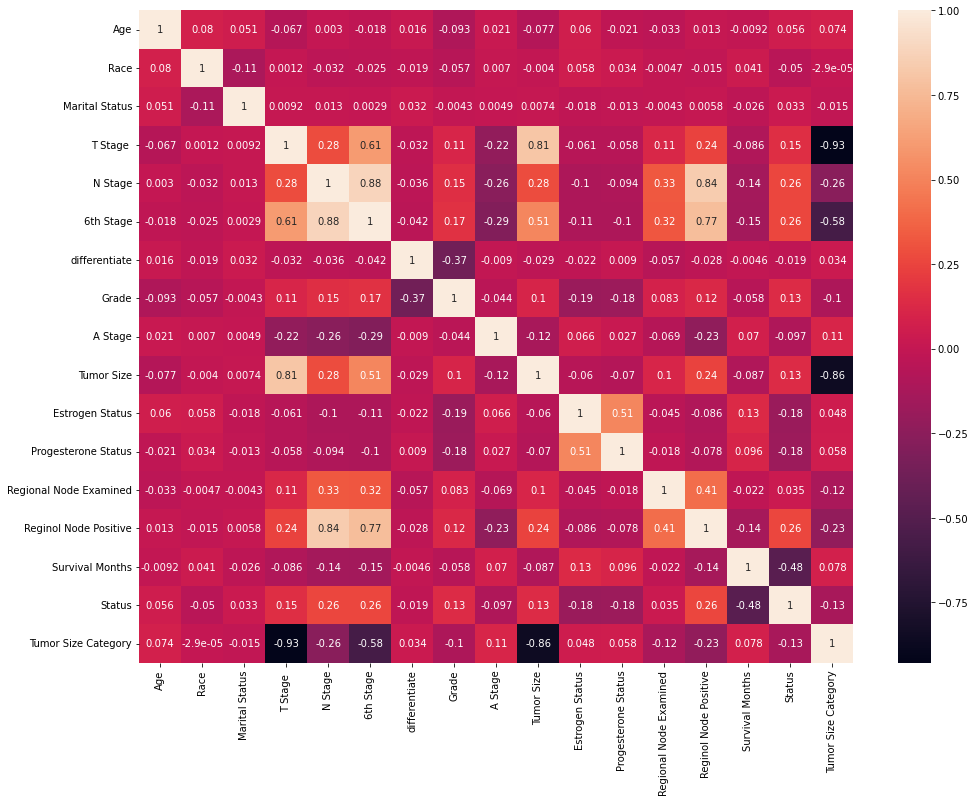

In [59]:
corr_matrix = data.corr()
f, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [60]:
X = data.drop(columns=['Status'])
y = data['Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

print(importances)

Survival Months           0.384880
Age                       0.121808
Regional Node Examined    0.100113
Tumor Size                0.096781
Reginol Node Positive     0.068584
Marital Status            0.038493
6th Stage                 0.030892
N Stage                   0.024541
Progesterone Status       0.023164
Race                      0.021577
Grade                     0.020333
T Stage                   0.019146
differentiate             0.015713
Estrogen Status           0.015707
Tumor Size Category       0.014421
A Stage                   0.003846
dtype: float64


In [61]:
cols_to_drop = ['differentiate', 'Estrogen Status', 'A Stage']  
df_cleaned = data.drop(columns=cols_to_drop)

Create Model

In [62]:
x= df_cleaned.drop(['Status'], axis=1)
y= df_cleaned['Status']

In [63]:
#we need to balance the dataset by decreasing the number of majority class samples or increasing the number of minority class samples
rs=RandomOverSampler(random_state=42)
x_res,y_res=rs.fit_resample(x,y)


In [64]:
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, test_size=0.2, random_state=42)

In [ ]:
model1=LogisticRegression()
model2=XGBRFClassifier()
model3=RandomForestClassifier()

In [66]:
def pred(model):
    model.fit(x_train, y_train)
    y_pred=model.predict(x_test)
    
    print("Accuracy: ", accuracy_score(y_test, y_pred))
    print("Precision: ", precision_score(y_test, y_pred))
    print("Recall: ", recall_score(y_test, y_pred))
    print("F1 Score: ", f1_score(y_test, y_pred))

In [67]:
pred(model1)

Accuracy:  0.7901687454145268
Precision:  0.8237232289950577
Recall:  0.7363770250368189
F1 Score:  0.7776049766718507


In [68]:
pred(model2)

Accuracy:  0.9728539985326485
Precision:  0.9546742209631728
Recall:  0.9926362297496318
F1 Score:  0.9732851985559566


In [69]:
pred(model3)

Accuracy:  0.8187820983125459
Precision:  0.8913043478260869
Recall:  0.7245949926362297
F1 Score:  0.7993501218521526
